In [22]:
import pandas as pd
from plotnine import *
from plotnine.data import *
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

df = pd.read_csv('data/allEdgesEvaluation.csv')
print(df.dtypes)
print(len(df.index))

tupleReference1                            object
tupleReference2                            object
remainsValid                                 bool
hasChangeAfterTrainPeriod                    bool
numDaysUntilRealChangeAfterTrainPeriod      int64
numEqualTransitions                         int64
numUnEqualTransitions                       int64
numEqualChangeTransitions                   int64
mutualInformationScore                    float64
newScore                                  float64
dtype: object
213884


# Validity and Interstingness

In [23]:
validRows = df[df['remainsValid']]
hasChangeAfterTrainPeriod = df[df['hasChangeAfterTrainPeriod']]
print("Total Row Count is", len(df.index), "of which ",len(validRows.index),"are valid - ",100*len(validRows.index)/len(df.index),"%"  )
print("Total Row Count is", len(df.index), "of which ",len(hasChangeAfterTrainPeriod.index),"are interesting - ",100*len(hasChangeAfterTrainPeriod.index)/len(df.index),"%"  )
validityInterestingnessConfusionMatrix = pd.crosstab(df['remainsValid'], df['hasChangeAfterTrainPeriod'])
validityInterestingnessConfusionMatrix

Total Row Count is 213884 of which  56441 are valid -  26.388603168072414 %
Total Row Count is 213884 of which  175317 are interesting -  81.96826317069065 %


hasChangeAfterTrainPeriod,False,True
remainsValid,,
False,27,157416
True,38540,17901


In [24]:
#we only keep those that are interesting for the evaluation:
df = df[df['hasChangeAfterTrainPeriod']]

/home/leon/data/dataset_versioning/plotting/plotting/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 184'. Pick better value with 'binwidth'.


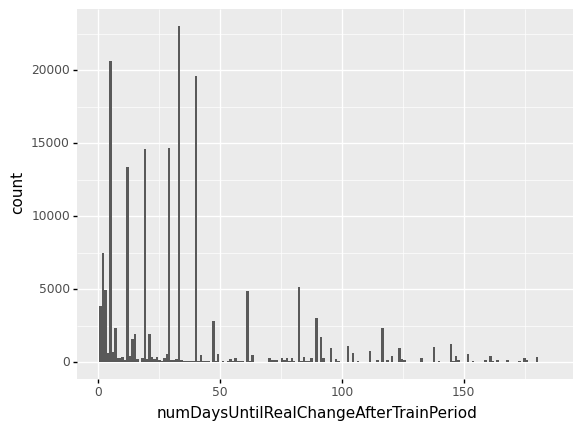

<ggplot: (8747699542595)>

In [25]:
ggplot(df, aes(x='numDaysUntilRealChangeAfterTrainPeriod', y=after_stat('count'))) + geom_histogram()

# Performance of the simpleScore

In [5]:
df['chosenByEqualChangeTransitionScore'] = df['numEqualChangeTransitions']>1
y_test = df['remainsValid']
y_pred = df['chosenByEqualChangeTransitionScore']
print("F1",f1_score(y_test, y_pred))
print("Precision",precision_score(y_test, y_pred))
print("Recall",recall_score(y_test, y_pred))  
print("Accuracy",accuracy_score(y_test, y_pred)) 
print()
print(pd.crosstab(y_test, y_pred))

F1 0.5464187671574744
Precision 0.4352450054666534
Recall 0.7338696162225574
Accuracy 0.8755967761255327

chosenByEqualChangeTransitionScore   False  True 
remainsValid                                     
False                               140370  17046
True                                  4764  13137


# Performance of the new Score

In [6]:
df['chosenByNewScore'] = df['newScore']>0
y_test = df['remainsValid']
y_pred = df['chosenByNewScore']
print("F1",f1_score(y_test, y_pred))
print("Precision",precision_score(y_test, y_pred))
print("Recall",recall_score(y_test, y_pred))  
print("Accuracy",accuracy_score(y_test, y_pred)) 
print()
print(pd.crosstab(y_test, y_pred))

F1 0.6975679542203147
Precision 0.9694800676011532
Recall 0.5447740349701135
Accuracy 0.9517673699641221

chosenByNewScore   False  True 
remainsValid                   
False             157109    307
True                8149   9752


In [7]:
invalidAndNewScoreGreater60 = df[(df['newScore']>60) & (~df['remainsValid'])]
invalidAndNewScoreGreater60

,tupleReference1,tupleReference2,remainsValid,hasChangeAfterTrainPeriod,numDaysUntilRealChangeAfterTrainPeriod,numEqualTransitions,numUnEqualTransitions,numEqualChangeTransitions,mutualInformationScore,newScore,chosenByEqualChangeTransitionScore,chosenByNewScore
44077,org.cityofchicago.cf2f-mmzv.0_14_831,org.cityofchicago.cf2f-mmzv.0_6_831,False,True,1,159,22,80,2.831441,78.6,True,True
44083,org.cityofchicago.cf2f-mmzv.0_14_834,org.cityofchicago.cf2f-mmzv.0_6_834,False,True,1,159,22,80,2.831441,78.6,True,True
52570,org.cityofchicago.pubx-yq2d.0_2_870,org.cityofchicago.pubx-yq2d.0_8_851,False,True,2,163,18,78,2.680460,77.6,True,True
52572,org.cityofchicago.pubx-yq2d.0_2_929,org.cityofchicago.pubx-yq2d.0_8_961,False,True,2,163,18,78,2.680460,77.6,True,True
63028,org.cityofchicago.pubx-yq2d.0_33_163,org.cityofchicago.pubx-yq2d.0_35_136,False,True,2,163,18,78,2.680460,77.6,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
189359,org.cityofchicago.pubx-yq2d.0_2_870,org.cityofchicago.pubx-yq2d.0_7_836,False,True,2,163,18,78,2.680460,77.6,True,True
189360,org.cityofchicago.pubx-yq2d.0_2_340,org.cityofchicago.pubx-yq2d.0_7_840,False,True,2,163,18,78,2.680460,77.6,True,True
191926,org.cityofchicago.pubx-yq2d.0_35_124,org.cityofchicago.pubx-yq2d.0_37_19,False,True,2,163,18,78,2.680460,77.6,True,True
210050,org.cityofchicago.pubx-yq2d.0_1_938,org.cityofchicago.pubx-yq2d.0_8_961,False,True,2,163,18,78,2.680460,77.6,True,True


The associated Dataset with the above errors is this one: https://data.cityofchicago.org/Transportation/Transportation-Department-Permits/pubx-yq2d 

/home/leon/data/dataset_versioning/plotting/plotting/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
/home/leon/data/dataset_versioning/plotting/plotting/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_histogram : Removed 21 rows containing missing values.


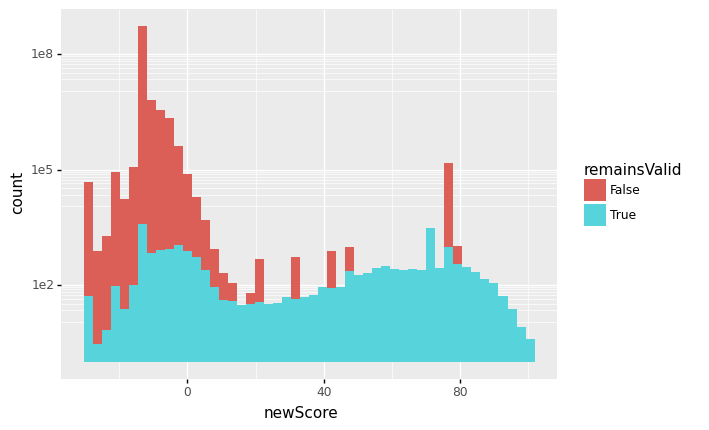

<ggplot: (8747699627641)>

In [8]:
ggplot(df, aes(x='newScore', y=after_stat('count'),fill='remainsValid')) + scale_y_log10() + geom_histogram(bins=50)

In [9]:
validAndNumEqualChangeTransitionsGreater0 = df[(df['numEqualChangeTransitions']>3) & (df['remainsValid'])]
numEqualChangeTransitionsGreater0 = df[df['numEqualChangeTransitions']>3]
print(len(validAndNumEqualChangeTransitionsGreater0.index) / len(numEqualChangeTransitionsGreater0.index))

0.6187928440060191


/home/leon/data/dataset_versioning/plotting/plotting/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
/home/leon/data/dataset_versioning/plotting/plotting/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_histogram : Removed 27 rows containing missing values.


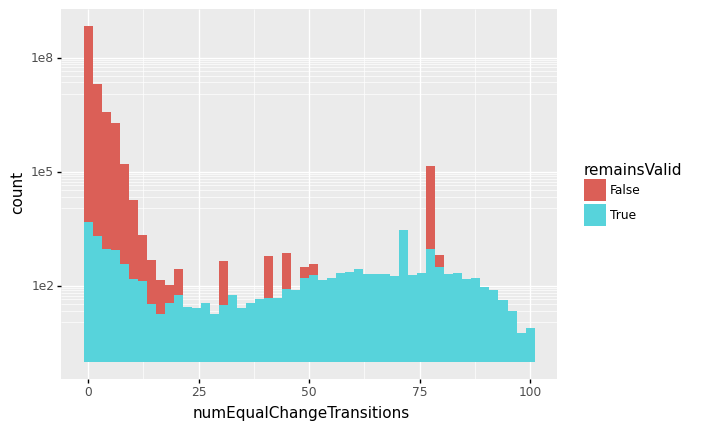

<ggplot: (8791748867943)>

In [21]:
ggplot(df, aes(x='numEqualChangeTransitions', y=after_stat('count'),fill='remainsValid')) + scale_y_log10() + geom_histogram(bins=50)

# Main Indicators for non-valid merges

/home/leon/data/dataset_versioning/plotting/plotting/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
/home/leon/data/dataset_versioning/plotting/plotting/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_histogram : Removed 44 rows containing missing values.


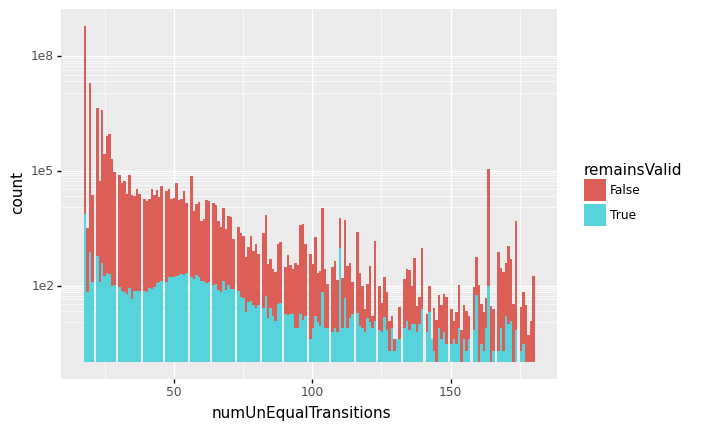

<ggplot: (8791748681406)>

In [22]:
ggplot(df, aes(x='numUnEqualTransitions', y=after_stat('count'),fill='remainsValid')) + scale_y_log10() + geom_histogram(bins=182)

# Clique Based Evaluation

In [26]:
dfClique = pd.read_csv('data/cliqueEvaluation.csv')
print(dfClique.dtypes)
print("Before filtering out Singletons:")
print(len(dfClique.index))
print("After filtering out Singletons:")
dfClique = dfClique[dfClique['cliqueSize']>1]
print(len(dfClique.index))

optimizationMethodName                    object
edgeScoreName                             object
mergedLineages                            object
cliqueSize                                 int64
numEdgesInClique                           int64
remainsValid                                bool
numValidEdges                              int64
numVerticesWithChangeAfterTrainPeriod      int64
totalScore                               float64
scoreAggregateMethodName                  object
dtype: object
Before filtering out Singletons:
51384
After filtering out Singletons:
9797


In [27]:
print("Total number of retained edges: ",sum(dfClique['numEdgesInClique']))

Total number of retained edges:  10718


# Validity and interestingness

In [28]:
validRows = dfClique[dfClique['remainsValid']]
dfClique['hasChangeAfterTrainPeriod'] = dfClique['numVerticesWithChangeAfterTrainPeriod']>0
dfClique['hasChangeAfterTrainPeriod']
hasChangeAfterTrainPeriod = dfClique[dfClique['hasChangeAfterTrainPeriod']]
print("Total Row Count is", len(dfClique.index), "of which ",len(validRows.index),"are valid - ",100*len(validRows.index)/len(dfClique.index),"%"  )
print("Total Row Count is", len(dfClique.index), "of which ",len(hasChangeAfterTrainPeriod.index),"are interesting - ",100*len(hasChangeAfterTrainPeriod.index)/len(dfClique.index),"%"  )
validityInterestingnessConfusionMatrix = pd.crosstab(dfClique['remainsValid'], dfClique['hasChangeAfterTrainPeriod'])
validityInterestingnessConfusionMatrix

Total Row Count is 9797 of which  9567 are valid -  97.65234255384301 %
Total Row Count is 9797 of which  9373 are interesting -  95.67214453404104 %


hasChangeAfterTrainPeriod,False,True
remainsValid,,
False,0,230
True,424,9143


In [29]:
#keep only those that are interesting:
dfClique = dfClique[dfClique['hasChangeAfterTrainPeriod']]

/home/leon/data/dataset_versioning/plotting/plotting/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
/home/leon/data/dataset_versioning/plotting/plotting/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_histogram : Removed 25 rows containing missing values.


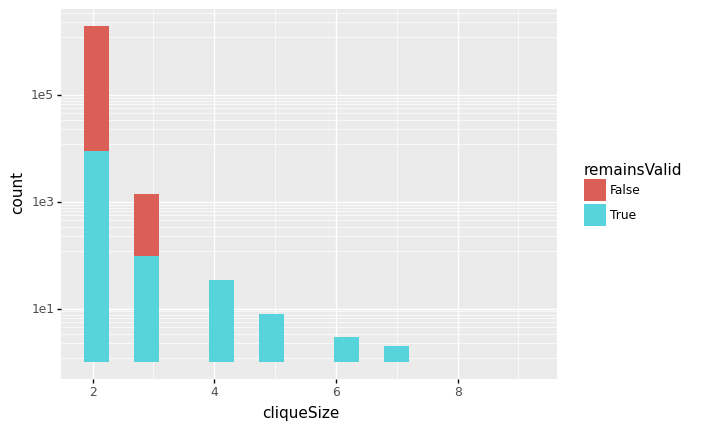

<ggplot: (8747699508971)>

In [16]:
ggplot(dfClique, aes(x='cliqueSize', y=after_stat('count'),fill='remainsValid')) + scale_y_log10()+ geom_histogram(bins=18)

# Precision/Recall/Accuracy

In [17]:
dfClique['predictedToBeValid'] = True
y_test = dfClique['remainsValid']
y_pred = dfClique['predictedToBeValid']
print("F1",f1_score(y_test, y_pred))
print("Precision",precision_score(y_test, y_pred))
print("Recall",recall_score(y_test, y_pred))  
print("Accuracy",accuracy_score(y_test, y_pred)) 
print()
print(pd.crosstab(y_test, y_pred))

F1 0.9875783106502484
Precision 0.9754614317721114
Recall 1.0
Accuracy 0.9754614317721114

predictedToBeValid  True
remainsValid            
False                230
True                9143


<ipython-input-17-c14ad8bc7c88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Validity by aggregated Score

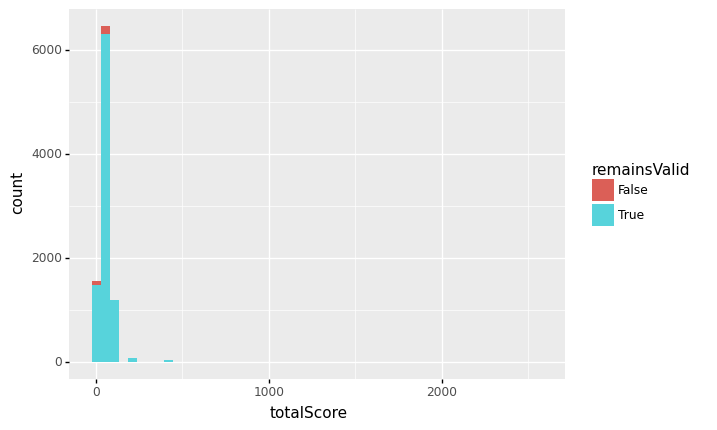

<ggplot: (8747699488642)>

In [18]:
ggplot(dfClique, aes(x='totalScore', y=after_stat('count'),fill='remainsValid'))  + geom_histogram(bins=50)

# Edge-Recall (in comparison to all valid edges)

In [30]:
df = df[df['hasChangeAfterTrainPeriod']]
dfClique = dfClique[dfClique['hasChangeAfterTrainPeriod']]
validEdges = len(df[df['remainsValid']].index)
retainedEdges = sum(dfClique['numEdgesInClique'])
print("validEdges",validEdges)
print("retainedEdges",retainedEdges)
print("Edge-Recall is ",retainedEdges / validEdges)

validEdges 17901
retainedEdges 9989
Edge-Recall is  0.5580135187978326
